In [70]:
# libs exploratorio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# libs pra regresão 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor


#libs para clusterização 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [71]:
#Carregando os dados
train = pd.read_csv("train.csv")
train = train.drop(columns = ['Id'])


Análise exploratória de dados

In [72]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [73]:
#Informações sobre o conjunto de dados
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,null_num,ratio
LotFrontage,259,0.177397
Alley,1369,0.937671
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
Electrical,1,0.000685


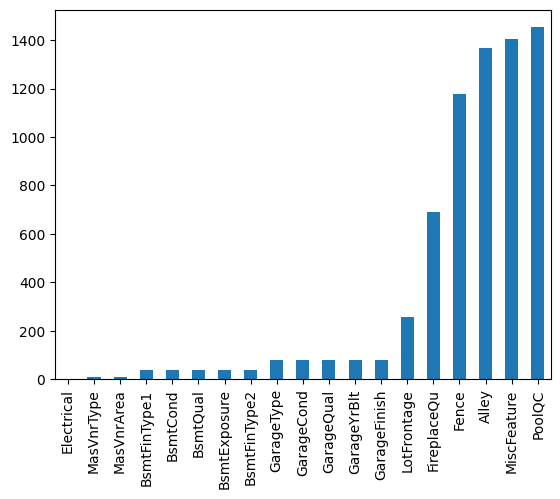

In [74]:
#Dados faltando
data_null= train.isnull().sum().sort_values()
data_null = data_null[data_null > 0]
data_null.sort_values(inplace=True)
data_null.plot.bar()

# calculo dos valores nulos 
null_feature=train.isna().sum()[train.isna().sum()>0]
null_feature_df=pd.DataFrame(null_feature, columns=['null_num'])
null_feature_df['ratio']=null_feature/len(train)
display(null_feature_df)

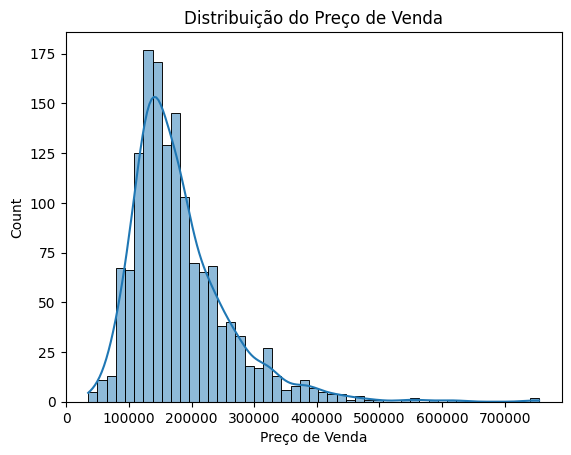

In [75]:
#Visualização a distribuição da variável alvo.
z = sns.histplot(data=train,  x='SalePrice', kde=True)
z.set_xlabel("Preço de Venda") 
z.set_ylabel("Count")
plt.title("Distribuição do Preço de Venda")
plt.show()

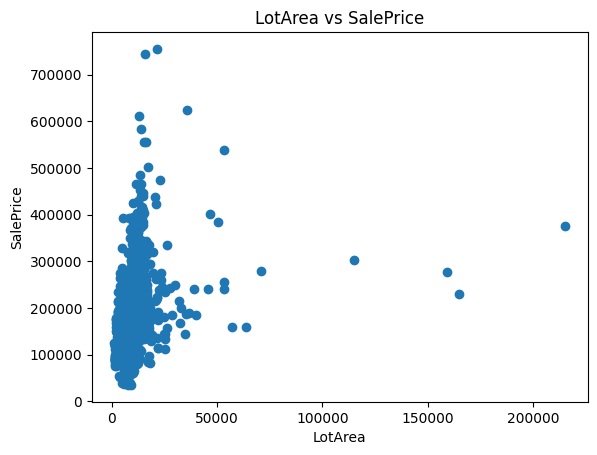

In [76]:
plt.scatter(train['LotArea'], train['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('LotArea vs SalePrice')
plt.show()

Featuring Engineering

<Axes: >

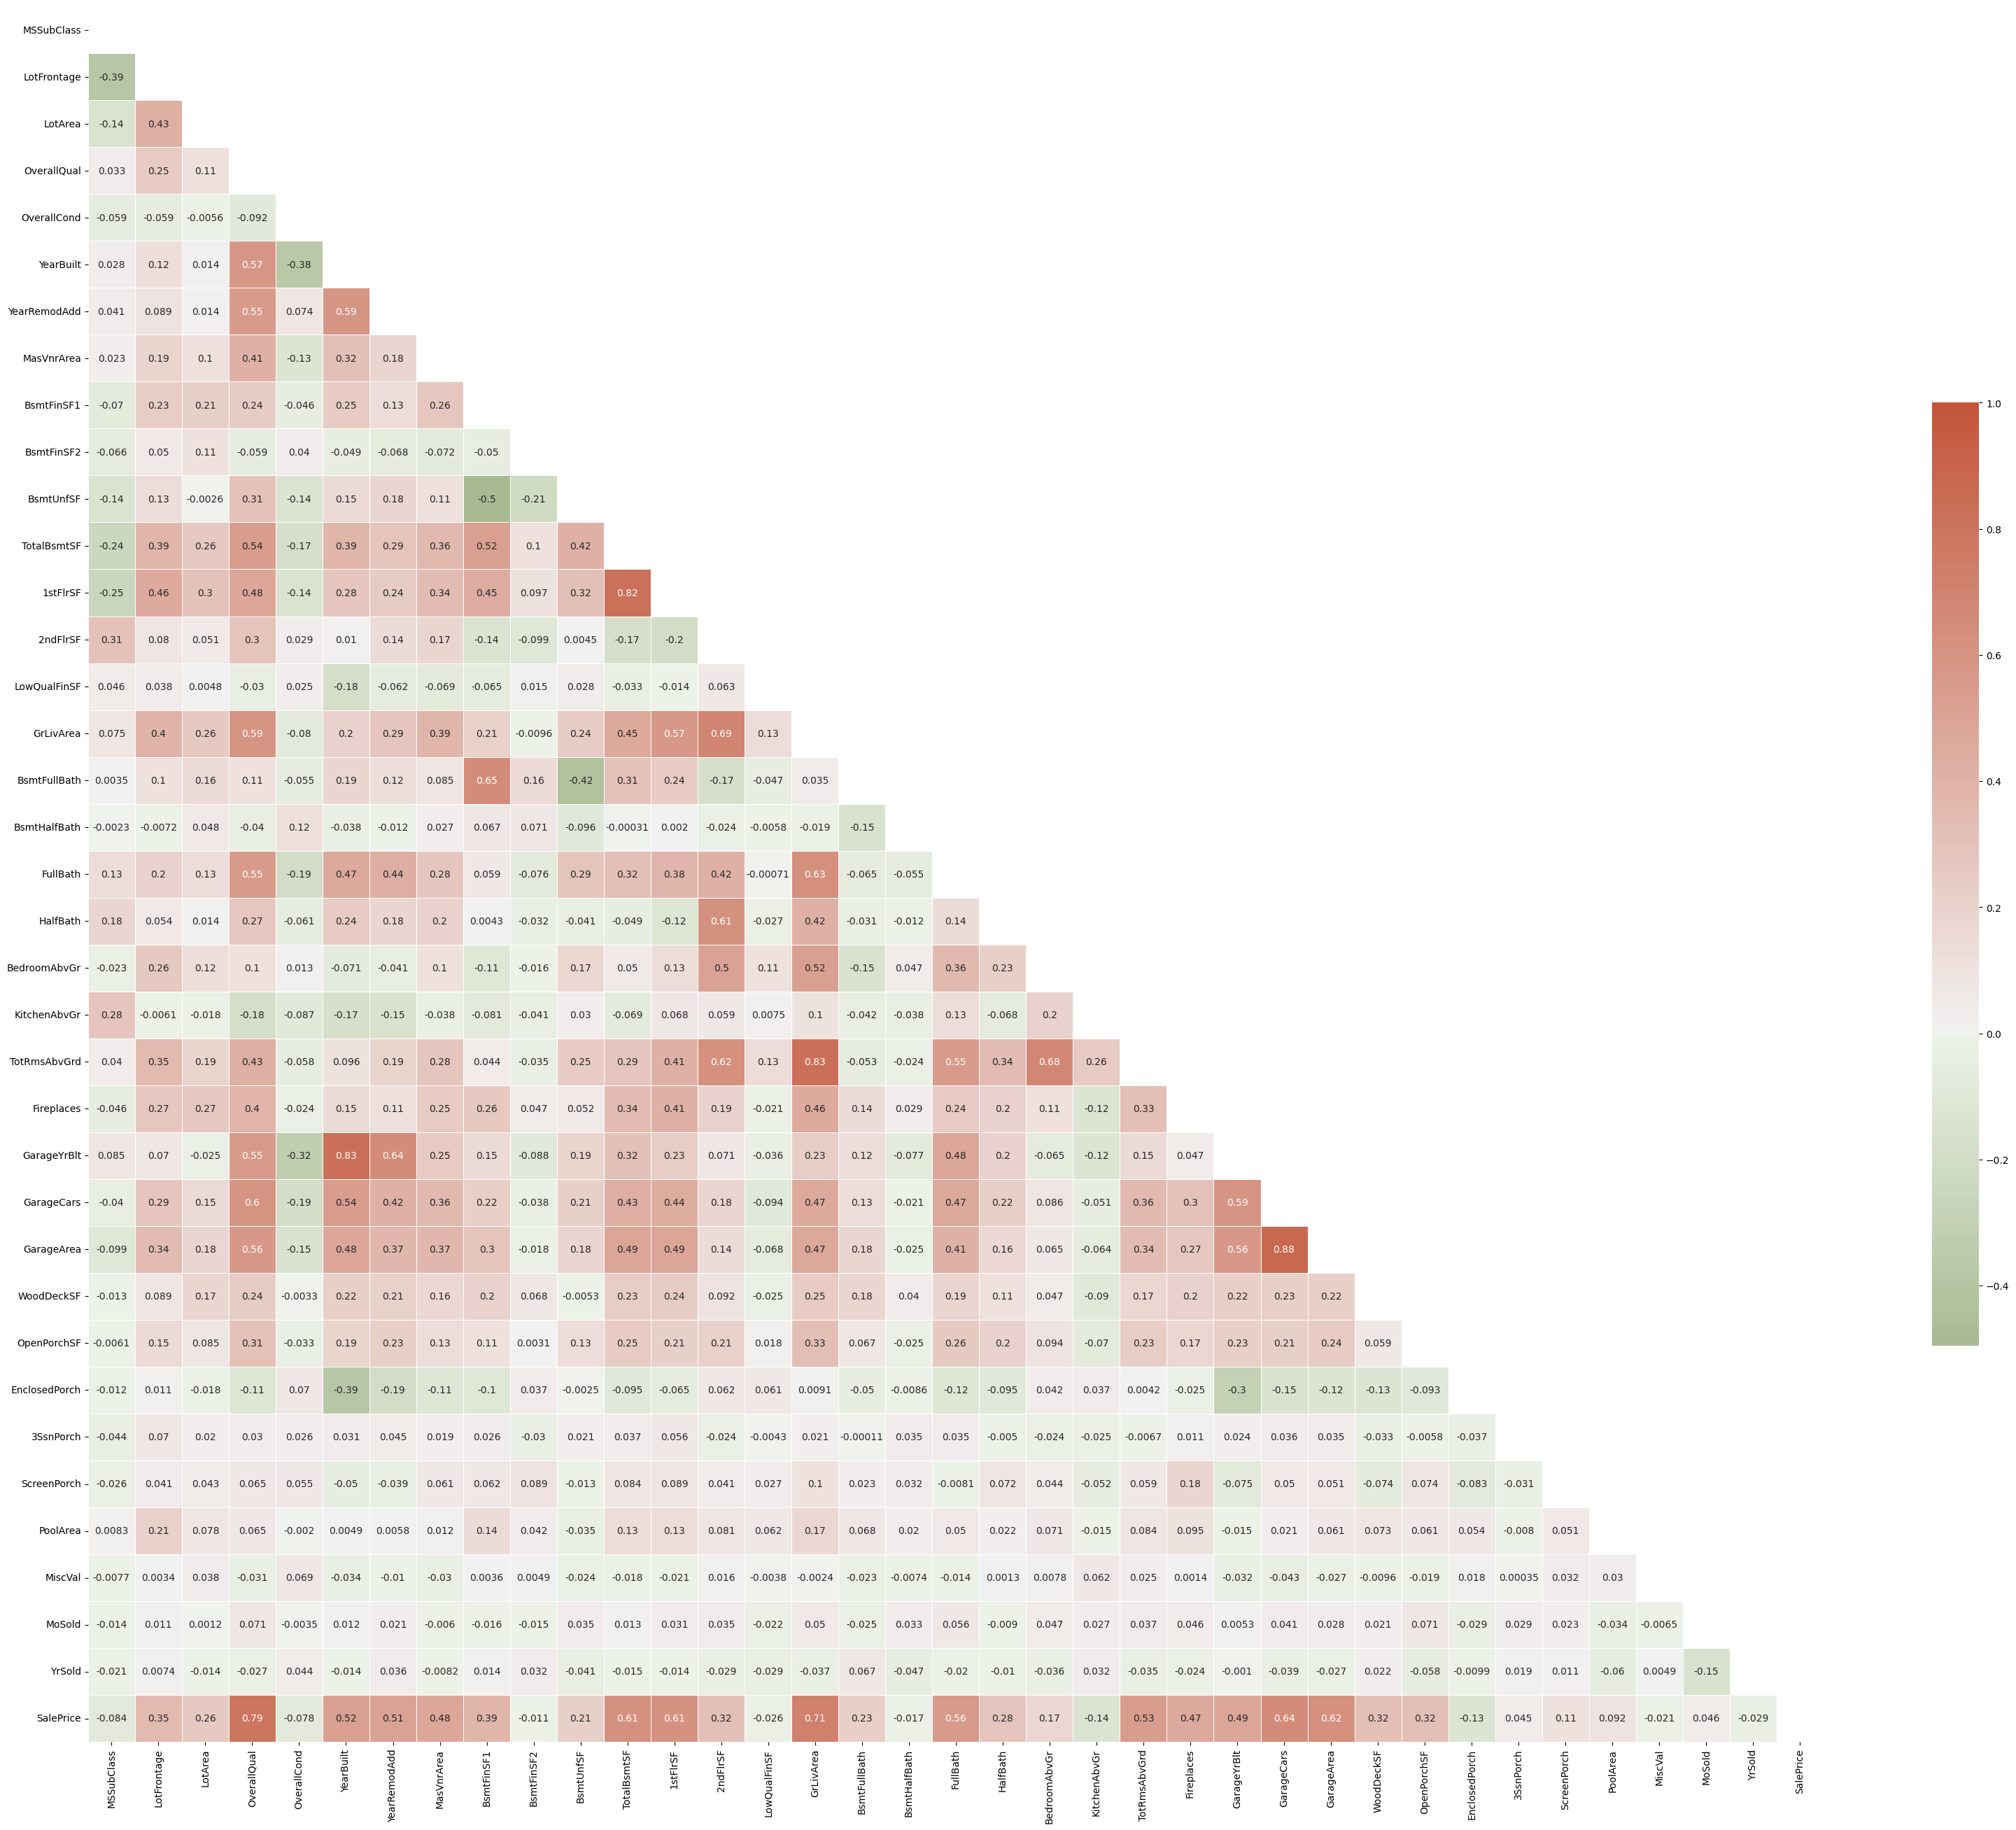

In [77]:
#Correlação entre as variáveis
f, ax = plt.subplots(figsize=(40, 35))
mat = train.corr(method='pearson', numeric_only=True)
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(110, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [78]:
#Descrição da variavel alvo de previsão "SalePrice"
#Podemos observar que valor max da variavel alvo é 755000.000000
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [79]:
#Tipos de dados
'''
Os seguintes recursos são do tipo inteiro nos dados originais, mas na realidade são recursos discretos ou relacionados ao tempo e precisam ser convertidos:
MSSubClass: Categoria de construção
OverallQual: Qualidade geral de materiais e acabamento
OverallCond: Condição geral
YearBuilt: Ano de construção original
YearRemodAdd: Ano de remodelação
GarageYrBlt: Ano de construção da garagem
MoSold: Mês de venda
YrSold: Ano de venda
'''
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

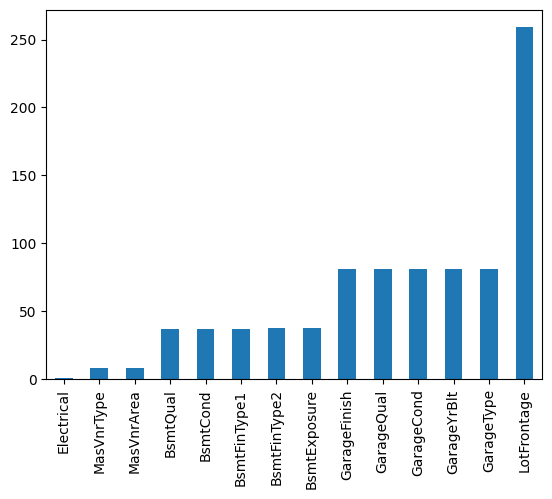

In [80]:
#Remova as características com mais de 30% de dados ausentes.
drop_index=null_feature_df[null_feature_df['ratio']>=0.3].index
train.drop(drop_index, axis=1, inplace=True)

#Dados faltando
data_null= train.isnull().sum().sort_values()
data_null = data_null[data_null > 0]
data_null.sort_values(inplace=True)
data_null.plot.bar()

#Dados faltando
train.isna().sum()[train.isna().sum()>0]

In [81]:
#preencher os valores nulos da coluna com a media de todos os valores da coluna 
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)

#preencher os valores nulos da coluna com a moda de todos os valores da coluna 
train['BsmtQual'].fillna(train['BsmtQual'].mode()[0], inplace = True)
train['BsmtCond'].fillna(train['BsmtCond'].mode()[0], inplace = True)
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace = True)
train['GarageType'].fillna(train['GarageType'].mode()[0], inplace = True)
train['GarageCond'].fillna(train['GarageCond'].mode()[0], inplace = True)
train['GarageQual'].fillna(train['GarageQual'].mode()[0], inplace = True)
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0], inplace = True)
train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0], inplace = True)
train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0], inplace = True)
train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0], inplace = True)
train['GarageFinish'].fillna(train['GarageFinish'].mode()[0], inplace = True)
train[['LotFrontage','GarageYrBlt','MasVnrArea','MasVnrType','BsmtQual','BsmtCond','Electrical','GarageType','GarageCond','GarageQual','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageFinish']]

,LotFrontage,GarageYrBlt,MasVnrArea,MasVnrType,BsmtQual,BsmtCond,Electrical,GarageType,GarageCond,GarageQual,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageFinish
0,65.0,2003.0,196.0,BrkFace,Gd,TA,SBrkr,Attchd,TA,TA,No,GLQ,Unf,RFn
1,80.0,1976.0,0.0,None,Gd,TA,SBrkr,Attchd,TA,TA,Gd,ALQ,Unf,RFn
2,68.0,2001.0,162.0,BrkFace,Gd,TA,SBrkr,Attchd,TA,TA,Mn,GLQ,Unf,RFn
3,60.0,1998.0,0.0,None,TA,Gd,SBrkr,Detchd,TA,TA,No,ALQ,Unf,Unf
4,84.0,2000.0,350.0,BrkFace,Gd,TA,SBrkr,Attchd,TA,TA,Av,GLQ,Unf,RFn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,1999.0,0.0,None,Gd,TA,SBrkr,Attchd,TA,TA,No,Unf,Unf,RFn
1456,85.0,1978.0,119.0,Stone,Gd,TA,SBrkr,Attchd,TA,TA,No,ALQ,Rec,Unf
1457,66.0,1941.0,0.0,None,TA,Gd,SBrkr,Attchd,TA,TA,No,GLQ,Unf,RFn
1458,68.0,1950.0,0.0,None,TA,TA,FuseA,Attchd,TA,TA,Mn,GLQ,Rec,Unf


Aprendizagem Supervisionada

In [82]:
# Selecionar as colunas categóricas a serem codificadas
colunas_categoricas = train.select_dtypes(exclude = [int, float]).columns.tolist()

# Criar uma instância do OrdinalEncoder
encoder = OrdinalEncoder()

# Ajustar e transformar os dados nas colunas selecionadas
train_new = train
train_new[colunas_categoricas] = encoder.fit_transform(train_new[colunas_categoricas])

In [83]:
# Random Forest Regressor 

# Separar as features (X) e o target (y) do dataset com SalePrice
X_forest = train.drop(['SalePrice'], axis=1)
y_forest = train['SalePrice']

# Dividir o conjunto de dados em treinamento e teste
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_forest, y_forest, random_state=42)

reg_f = RandomForestRegressor(random_state=42)

# Padronizar as variáveis preditoras
sc = StandardScaler()
X_train_f = sc.fit_transform(X_train_f)
X_test_f = sc.transform(X_test_f)

reg_f.fit(X_train_f, y_train_f)
y_pred_f = reg_f.predict(X_test_f)

print("Métricas de avaliação do modelo de random forest:")
print("Erro Médio Quadrático (MSE):", mean_squared_error(y_test_f, y_pred_f))
print("Erro Absoluto Médio (MAE):",  mean_absolute_error(y_test_f, y_pred_f))
print("Coeficiente de Determinação (R^2):", r2_score(y_test_f, y_pred_f))

Métricas de avaliação do modelo de random forest:
Erro Médio Quadrático (MSE): 737277390.9384383
Erro Absoluto Médio (MAE): 17014.966904109588
Coeficiente de Determinação (R^2): 0.8947544804333457


Acurácia: 0.93


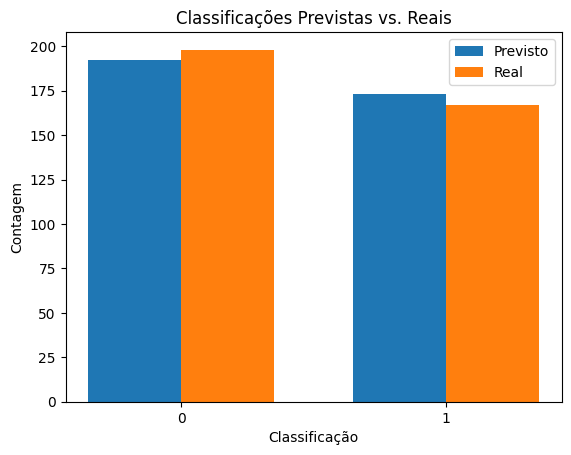

In [84]:
# Definir a variável alvo como uma variável binária
train['SalePrice'] = train['SalePrice'].apply(lambda x: 1 if x > train['SalePrice'].median() else 0)

# Selecionar as colunas relevantes para a classificação
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X = train[features]
y = train['SalePrice']

# Pré-processar as variáveis categóricas usando codificação one-hot
X = pd.get_dummies(X)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Criar e treinar o modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Realizar a classificação no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: %.2f" % accuracy)

# Calcular as contagens de classificações previstas e reais
unique_labels = np.unique(y_test)
predicted_counts = np.bincount(y_pred)
true_counts = np.bincount(y_test)

# Configurar as posições das barras no gráfico
x = np.arange(len(unique_labels))
width = 0.35

# Plotar as barras para as classificações previstas
fig, ax = plt.subplots()
ax.bar(x - width/2, predicted_counts, width, label='Previsto')

# Plotar as barras para as classificações reais
ax.bar(x + width/2, true_counts, width, label='Real')

# Configurar o eixo x e as legendas
ax.set_xticks(x)
ax.set_xticklabels(unique_labels)
ax.set_xlabel('Classificação')
ax.set_ylabel('Contagem')
ax.set_title('Classificações Previstas vs. Reais')
ax.legend()

# Exibir o gráfico
plt.show()

Aprendizagem não supervisionada

c:\Users\Daniel\OneDrive\Faculdade\Analise de Dados Aplicado Computação\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Daniel\OneDrive\Faculdade\Analise de Dados Aplicado Computação\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Daniel\OneDrive\Faculdade\Analise de Dados Aplicado Computação\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Daniel\OneDrive\Faculdade\Analise de Dados Aplicado Computação\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: Futur

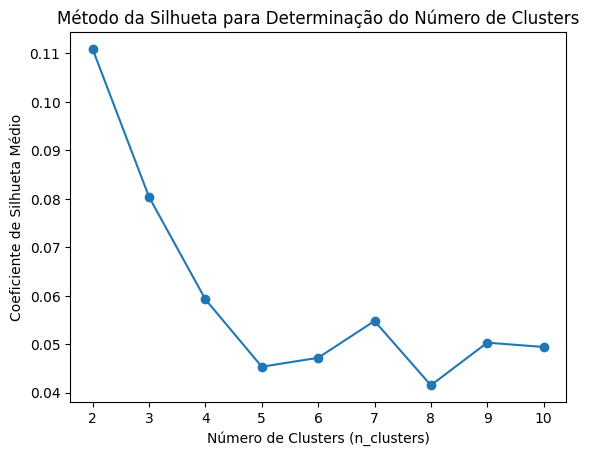

Número ideal de clusters método da silhueta: 2


In [85]:
# Selecionar as colunas relevantes para o clustering
scaler = StandardScaler()

# Pré-processar os dados
X_scaled = scaler.fit_transform(train_new)

silhouette_scores_test = []
# Obter os rótulos dos clusters
k = range(2, 11) # Número de clusters

# Aplicar o algoritmo de agrupamento (K-means)
for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores_test.append(silhouette_avg)

# Visualizar os resultados do clustering
plt.plot(range(2, 11), silhouette_scores_test, marker='o')
plt.xlabel('Número de Clusters (n_clusters)')
plt.ylabel('Coeficiente de Silhueta Médio')
plt.title('Método da Silhueta para Determinação do Número de Clusters')
plt.show()

best_n_clusters = k[np.argmax(silhouette_scores_test)]
print("Número ideal de clusters método da silhueta:", best_n_clusters)

c:\Users\Daniel\OneDrive\Faculdade\Analise de Dados Aplicado Computação\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Daniel\OneDrive\Faculdade\Analise de Dados Aplicado Computação\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Daniel\OneDrive\Faculdade\Analise de Dados Aplicado Computação\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Daniel\OneDrive\Faculdade\Analise de Dados Aplicado Computação\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: Futur

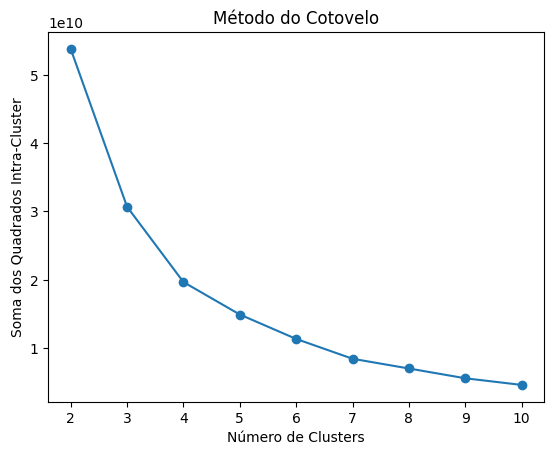

In [86]:
y = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_new)
    y.append(kmeans.inertia_)
    
plt.plot(range(2, 11), y, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Intra-Cluster')
plt.title('Método do Cotovelo')
plt.show()